In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as PP
import numpy as np
import sys
import glob
import cv2
import os
import xarray as xr
import cartopy.crs as ccrs
from scipy import interpolate
import gc 

%load_ext autoreload
%autoreload 2
from ARsize_cmip56_library import *


In [2]:
runs

['cmip5_CCSM4_historical',
 'cmip5_CCSM4_rcp85',
 'cmip5_CSIRO-Mk3-6-0_historical',
 'cmip5_CSIRO-Mk3-6-0_rcp85',
 'cmip5_CanESM2_historical',
 'cmip5_CanESM2_rcp85',
 'cmip5_IPSL-CM5A-LR_historical',
 'cmip5_IPSL-CM5A-LR_rcp85',
 'cmip5_IPSL-CM5B-LR_historical',
 'cmip5_IPSL-CM5B-LR_rcp85',
 'cmip5_NorESM1-M_historical',
 'cmip5_NorESM1-M_rcp85',
 'cmip6_BCC-CSM2-MR_historical',
 'cmip6_BCC-CSM2-MR_ssp585',
 'cmip6_IPSL-CM6A-LR_historical',
 'cmip6_IPSL-CM6A-LR_ssp585',
 'cmip6_MRI-ESM2-0_historical',
 'cmip6_MRI-ESM2-0_ssp585']

In [3]:
""" Load analysis data for the first run """

f = xr.open_dataset(output_fName(runs[0]))
# f1 = xr.open_dataset(f1Name(runs[0]))


In [4]:
""" Print the total number of ARs object (regardless of life cycle stage) """

ARs = len(np.unique(f.track_id))
print("{} ARs time stamps (AR objects) analyzed".format(ARs))


307582 ARs time stamps (AR objects) analyzed


In [5]:
""" Print the total number of ARs cases analyzed """

ARs = len(np.unique(f.ar_id))
print("{} ARs cases analyzed".format(ARs))


22687 ARs cases analyzed


In [6]:
""" Extract AR identifier number """

AR_id = f.ar_id.values
AR_unique_id = np.unique(AR_id)
print(len(AR_id), len(AR_unique_id))


11208183 22687


In [7]:
# fhf

In [8]:
indNoNan = np.where(np.logical_not(np.isnan(f.width.values)))[0]
lon = f.lon.values[indNoNan]
lat = f.lat.values[indNoNan]
width = f.width.values[indNoNan]
length = f.length.values[indNoNan]
area = f.area.values[indNoNan]
stage0 = (f.stage/f.life).values[indNoNan]
life0 = f.life.values[indNoNan]
ar_id = f.life.values[indNoNan]
track_id = f.track_id.values[indNoNan]


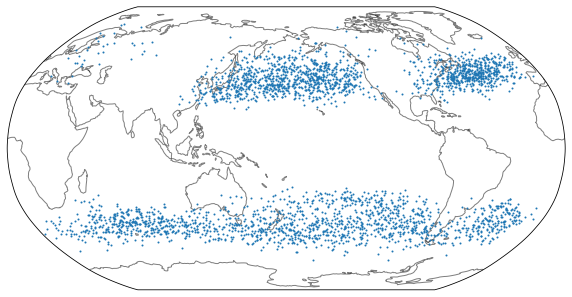

In [9]:
fig=PP.figure(figsize=(10,10))
coords = projection=ccrs.PlateCarree()
proj   = projection=ccrs.Robinson(central_longitude=-180)
res = '110m'
ax = fig.add_subplot(projection=proj)

sample = np.arange(len(lon))
subsample = 100
size = int(len(sample)/subsample)
ind = np.random.choice(sample, size=size, replace=False)

ax.set_global()
ax.coastlines(resolution=res, alpha=0.5)
ax.plot(lon[ind], lat[ind], '.', markersize=2, transform=coords)


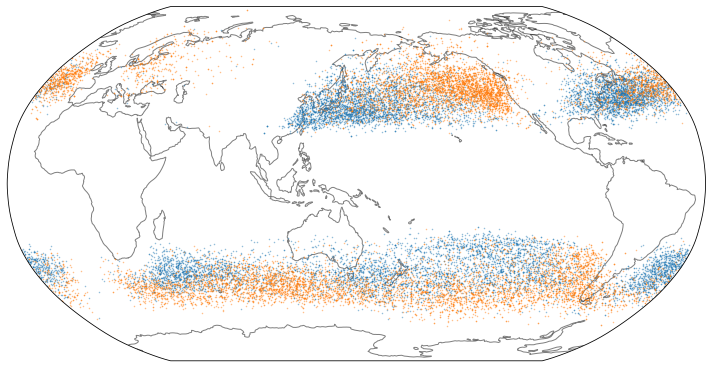

In [10]:
ind10 = np.where((stage0<=0.12)&(stage0>=0.08))[0]
ind90 = np.where((stage0<=0.92)*(stage0>=0.88))[0]

fig=PP.figure(figsize=(10,10))

coords = projection=ccrs.PlateCarree()
proj   = projection=ccrs.Robinson(central_longitude=150)
res = '110m'
ax = fig.add_subplot(projection=proj)

sample = np.arange(len(lon))
subsample = 100
size = int(len(sample)/subsample)
ind = np.random.choice(sample, size=size, replace=False)

ax.set_global()
ax.coastlines(resolution=res, alpha=0.5)
ax.plot(lon[ind10], lat[ind10], '.', markersize=1, transform=coords, alpha=0.5)
ax.plot(lon[ind90], lat[ind90], '.', markersize=1, transform=coords, alpha=0.5)

fig.tight_layout()
fig.show()


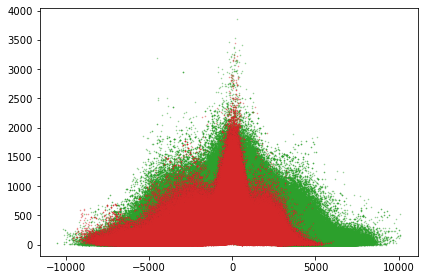

In [11]:
fig,ax=PP.subplots()

sample = np.arange(len(f.d0))
subsample = 5000

size = int(len(sample)/subsample)
ind = np.random.choice(sample, size=size, replace=False)

p = ax.plot(f.d0[ind], f.ivt0[ind],'.', markersize=1, alpha=.5)
p = ax.plot(f.d1[ind], f.ivt1[ind],'.', markersize=1, alpha=.5)
    
p = ax.plot(f.d0, f.ivt0,'.', markersize=1, alpha=.5)
p = ax.plot(f.d1, f.ivt1,'.', markersize=1, alpha=.5)

fig.tight_layout()
fig.show()


In [12]:
%%time

w, pdfw_mean, pdfw, \
l, pdfl_mean, pdfl, \
a, pdfa_mean, pdfa =  calculate_full_PDF(width, length, area, stage0)


CPU times: user 1.19 s, sys: 36.1 ms, total: 1.23 s
Wall time: 1.23 s


In [13]:
%%time

stage1 = (f.stage/f.life).values
life = f.life.values

d0,ivt0 = f.d0.values, f.ivt0.values
d1,ivt1 = f.d1.values, f.ivt1.values


CPU times: user 181 ms, sys: 72.1 ms, total: 253 ms
Wall time: 502 ms


In [14]:
%%time

X0,         IVT0,       CDF0_mean, CDF0,   \
X1,         IVT1,       CDF1_mean, CDF1,   \
PDFX0_mean, PDFY0_mean, PDFX0,     PDFY0,  \
PDFX1_mean, PDFY1_mean, PDFX1,     PDFY1 = \
             calculate_full_CDF(d0, ivt0, d1, ivt1, stage1)


CPU times: user 1min 3s, sys: 11.3 s, total: 1min 15s
Wall time: 1min 15s


CPU times: user 310 ms, sys: 24.8 ms, total: 335 ms
Wall time: 319 ms


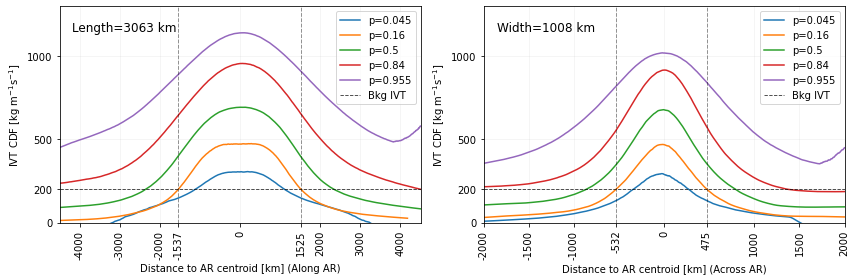

In [15]:
%%time

plot_CDF_contours(PDFX0_mean,PDFY0_mean,PDFX1_mean,PDFY1_mean)


CPU times: user 12.4 s, sys: 1.3 s, total: 13.7 s
Wall time: 13.6 s


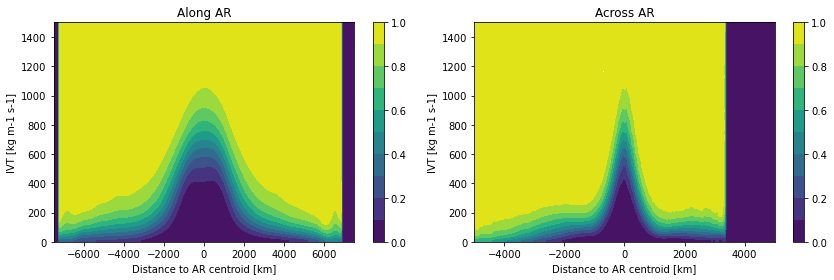

In [16]:
%%time

plot_CDF(X0, IVT0, CDF0_mean, X1, IVT1, CDF1_mean)


CPU times: user 600 ms, sys: 212 ms, total: 812 ms
Wall time: 549 ms


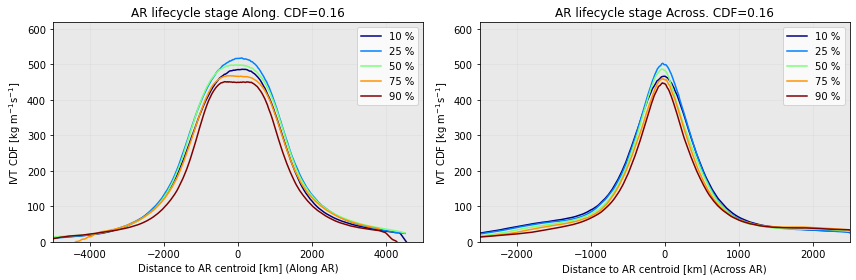

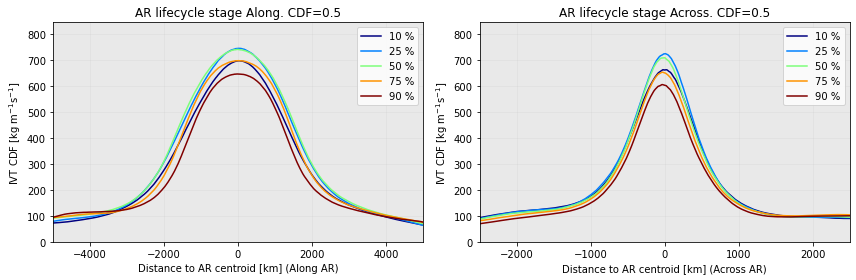

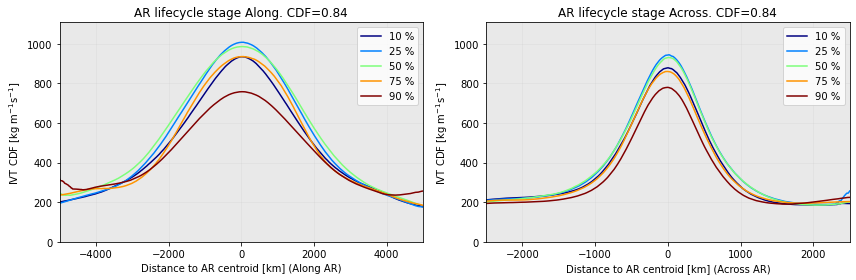

In [17]:
%%time

plot_mean_cdf_stages(PDFX0, PDFY0, PDFX1, PDFY1, pCritic=0.16)
plot_mean_cdf_stages(PDFX0, PDFY0, PDFX1, PDFY1, pCritic=0.50)
plot_mean_cdf_stages(PDFX0, PDFY0, PDFX1, PDFY1, pCritic=0.84)


In [18]:
del(X0,IVT0,CDF0_mean, CDF0,IVT1,CDF1_mean,CDF1)
del(PDFX0_mean,PDFY0_mean,PDFX0,PDFY0)
del(PDFX1_mean,PDFY1_mean,PDFX1,PDFY1)
del(lon,lat,width,length,area,stage0,life0,ar_id)
del(track_id,w,pdfw_mean,pdfw,l,pdfl_mean,pdfl,a,pdfa_mean,pdfa)
del(d0,d1,ivt0,ivt1)

gc.collect()


27059

In [19]:
# """ This function is to analyse uzsing the scripts ans save directly as arrays, instead of dictionaries for easier plotting """
# %%time

# X0,         IVT0,  CDF0_mean,  CDF0, \
# X1,         IVT1,  CDF1_mean,  CDF1, \
# PDFY0_mean, PDFY0, PDFY1_mean, PDFY1 = calculate_full_CDF_arrays(d0, ivt0, d1, ivt1, stage1)


### Analyze and save data

In [20]:
""" Test on runs[0]='cmip5_CCSM4_historical' """

if not os.path.exists("output/nc_cdf_pdf/cmip5_CCSM4_historical.nc"):
    analyze_run('cmip5_CCSM4_historical', verbose=True)
else:
    print("File {} exists".format("cmip5_CCSM4_historical"))


File cmip5_CCSM4_historical exists


In [21]:
f = xr.open_dataset("output/nc_cdf_pdf/cmip5_CCSM4_historical.nc")
f


<xarray.Dataset>
Dimensions:                   (ivt: 2001, pc: 20001, pContours: 5, stage: 19, widths: 1001, lengths: 1001, areas: 1001)
Coordinates:
  * pc                        (pc) float64 -1e+04 -9.999e+03 ... 9.999e+03 1e+04
  * ivt                       (ivt) float64 0.0 1.0 2.0 ... 1.999e+03 2e+03
  * pContours                 (pContours) float64 0.045 0.16 0.5 0.84 0.955
  * stage                     (stage) int64 5 10 15 20 25 30 ... 75 80 85 90 95
  * widths                    (widths) float64 0.0 10.0 20.0 ... 9.99e+03 1e+04
  * lengths                   (lengths) float64 0.0 10.0 20.0 ... 9.99e+03 1e+04
  * areas                     (areas) float64 0.0 1e+11 2e+11 ... 9.99e+13 1e+14
Data variables: (12/14)
    cdf_along_mean            (ivt, pc) float64 ...
    cdf_across_mean           (ivt, pc) float64 ...
    cdf_contours_along_mean   (pContours, pc) float64 ...
    cdf_contours_across_mean  (pContours, pc) float64 ...
    cdf_along                 (stage, ivt, pc) float64 ...
    cdf_across                (stage, ivt, pc) float64 ...
    ...                        ...
    pdf_width                 (stage, widths) float64 ...
    pdf_length                (stage, lengths) float64 ...
    pdf_area                  (stage, areas) float64 ...
    pdf_width_mean            (widths) float64 ...
    pdf_length_mean           (lengths) float64 ...
    pdf_area_mean             (areas) float64 ...
Attributes:
    description:  Calculated using the algorithms outlined in Inda-Diaz et al...

In [22]:
# """ Analyze all runs output """

# for run in runs:
#     analyze_run(run, verbose=True)
    

### Background IVT field


In [23]:
runs


['cmip5_CCSM4_historical',
 'cmip5_CCSM4_rcp85',
 'cmip5_CSIRO-Mk3-6-0_historical',
 'cmip5_CSIRO-Mk3-6-0_rcp85',
 'cmip5_CanESM2_historical',
 'cmip5_CanESM2_rcp85',
 'cmip5_IPSL-CM5A-LR_historical',
 'cmip5_IPSL-CM5A-LR_rcp85',
 'cmip5_IPSL-CM5B-LR_historical',
 'cmip5_IPSL-CM5B-LR_rcp85',
 'cmip5_NorESM1-M_historical',
 'cmip5_NorESM1-M_rcp85',
 'cmip6_BCC-CSM2-MR_historical',
 'cmip6_BCC-CSM2-MR_ssp585',
 'cmip6_IPSL-CM6A-LR_historical',
 'cmip6_IPSL-CM6A-LR_ssp585',
 'cmip6_MRI-ESM2-0_historical',
 'cmip6_MRI-ESM2-0_ssp585']

In [24]:
from ARsize_cmip56_library import *


In [25]:
# """ Test on runs[0]='cmip5_CCSM4_historical' """

# run = runs[6]
# fName = "output/nc_cdf_pdf/ivt_bk_{}.nc".format(run)

# if not os.path.exists(fName):
#     analyze_full_ivt_bk(run)


In [26]:
# """ Test on runs[0]='cmip5_CCSM4_historical' """

# for run in ['cmip5_IPSL-CM5A-LR_historical','cmip5_IPSL-CM5B-LR_historical']:

#     analyze_full_ivt_bk(run)
    

In [27]:
# """ Show analyzed data """
# f = xr.open_dataset(fName)
# f


In [28]:
# """ Plot CDF, PDF, and sigmas value for first run example, all 4 types of background sampling """

# for i in [1,2,3,4]:
    
#     variables = "(f.ivt,f.mean_pdf_{},f.mean_cdf_{},f.mean_mSigma_{}.values,f.mean_pSigma_{}.values)".format(i,i,i,i,i)
#     command = "plot_ivt_pdfs({})".format(variables)
# #     print(command)
#     exec(command)
    

In [29]:
# """ Plot sigma values for 4 types of background over time for first run, runs[0]='cmip5_CCSM4_historical' """

# fig,ax = PP.subplots()

# ax.plot(f.time, f.pSigma_1,'.')
# ax.plot(f.time, f.pSigma_2,'.')
# ax.plot(f.time, f.pSigma_3,'.')
# ax.plot(f.time, f.pSigma_4,'.')

# ax.grid(alpha=0.35)


In [30]:
names = ["output/nc_cdf_pdf/ivt_bk_cmip5_IPSL-CM5A-LR_historical.nc", \
         "output/nc_cdf_pdf/ivt_bk_cmip5_IPSL-CM5B-LR_historical.nc" ]

for fName in names:
    f = xr.open_dataset(fName)
    print(f.time)
    # f2 = f.isel(time=slice(0,10,1))
    # f.close()
    # # print(f2.time)
    # f2.to_netcdf("tmp.nc")
    # command = "mv tmp.nc {}".format(fName)
    # print(command)
    # os.system(command)
    

<xarray.DataArray 'time' (time: 11)>
array([cftime.DatetimeNoLeap(1950, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1955, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1960, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1965, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1970, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1975, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1985, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1950-01-01 00:00:00 ... 2000-01-01 00:00:00
Attributes:
    long_name:    5-year perdiod

In [31]:
# fName

In [32]:
hFiles = np.sort(glob.glob("output/nc_cdf_pdf/ivt*historical*"))
fFiles = np.sort(glob.glob("output/nc_cdf_pdf/ivt*85*"))


In [33]:
try:
    del(hmf,fmf)
except:
    print("There are not datasets")
    pass

hmf = xr.open_mfdataset(hFiles, combine="nested", concat_dim="realization", decode_times=False, decode_cf=False)
fmf = xr.open_mfdataset(fFiles, combine="nested", concat_dim="realization", decode_times=False, decode_cf=False)


There are not datasets


In [34]:
ivtbk_description = {}
ivtbk_description[1] = "Sample IVT from everywhere without filtering"
ivtbk_description[2] = "Sample IVT without filtering, except where there ar ARs"
ivtbk_description[3] = "Sample IVT from everywhere after filtering the equator using gaussian band"
ivtbk_description[4] = "Sample IVT from places without AR after filtering the equator using gaussian band"
    

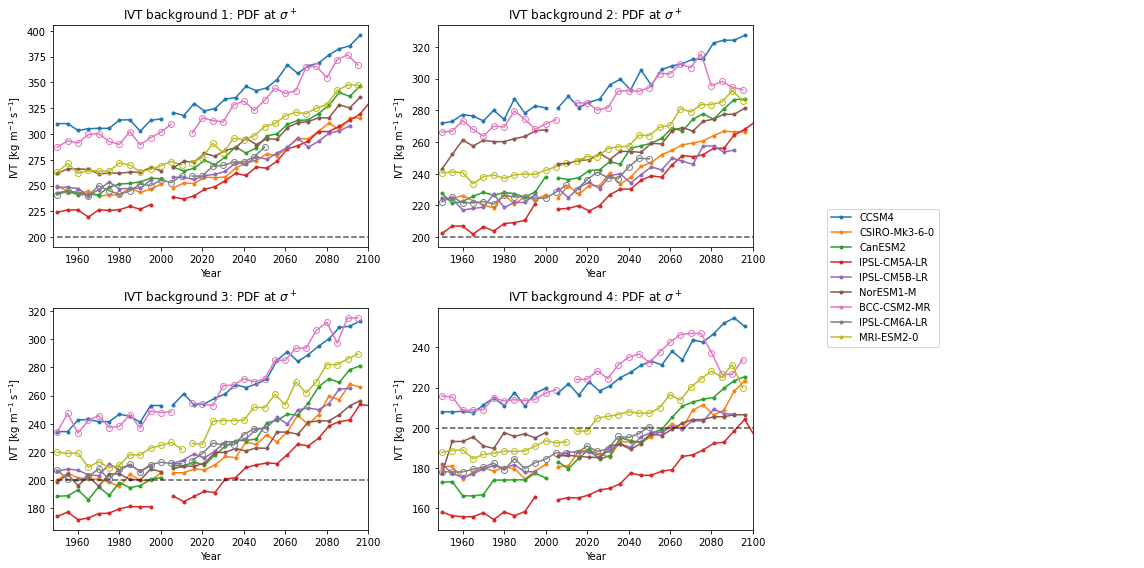

In [35]:
from matplotlib import gridspec

fig,axs = PP.subplots(figsize=(16,8))
gs = gridspec.GridSpec(4, 3)
ax0 = PP.subplot(gs[0:2,0])
ax1 = PP.subplot(gs[0:2,1])
ax2 = PP.subplot(gs[2:4,0])
ax3 = PP.subplot(gs[2:4,1])
ax4 = PP.subplot(gs[0:4,2])
axs = (ax0,ax1,ax2,ax3,ax4)

for i,ax in enumerate(axs[:4]):
    bk = i+1

    # Plot historical runs
    for f in hFiles:
        with xr.open_dataset(f) as fin:
            x = [int(str(t).split("-")[0]) for t in fin.time.values]
            if "cmip5" in f:
                command = "ax.plot(x,fin.pSigma_{}.values, '.-')".format(bk)
            else:
                command = "ax.plot(x,fin.pSigma_{}.values, 'o-', mfc='none')".format(bk)
            exec(command)

    # Reset pyplot plot propierties cycle 
    ax.set_prop_cycle(None)
    
    # Plot Future runs
    for f in fFiles:
        with xr.open_dataset(f) as fin:
            x = [int(str(t).split("-")[0]) for t in fin.time.values]
            if "cmip5" in f:
                command = "ax.plot(x,fin.pSigma_{}.values, '.-')".format(bk)
            else:
                command = "ax.plot(x,fin.pSigma_{}.values, 'o-', mfc='none')".format(bk)
            exec(command)

for i,ax in enumerate(axs[:4]):
    bk = i+1

    x = np.arange(1950,2110,1,dtype="int")
    ax.set_xlim(1948,2100)
    ax.plot(x,np.zeros_like(x)+200, "--", c="black", alpha=0.65)
    ax.set_xlabel("Year")
    ax.set_ylabel(u"IVT [kg m$^{-1}$ s$^{-1}$]")
    ax.set_title(u"IVT background {}: PDF at $\sigma^+$".format(bk))

labels = [r.split("_")[1] for r in runs if "85" in r]
for lab in labels:
    ax4.plot(1,2,".-", label=lab)

ax4.set_xlim(-999,-998)
ax4.legend(loc="center left")
ax4.axis("off")
fig.tight_layout()
fig.show()



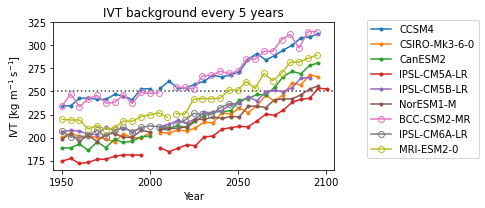

In [36]:
fig,ax = PP.subplots(figsize=(7,3))
labels = [r.split("_")[1] for r in runs if "85" in r]

# Plot historical runs
for i,f in enumerate(hFiles):
    with xr.open_dataset(f) as fin:
        x = [int(str(t).split("-")[0]) for t in fin.time.values]
        if "cmip5" in f:
            command = "ax.plot(x,fin.pSigma_3.values, '.-', label=labels[i])"
        else:
            command = "ax.plot(x,fin.pSigma_3.values, 'o-', mfc='none', label=labels[i])"
        exec(command)

# Reset pyplot plot propierties cycle 
ax.set_prop_cycle(None)
    
# Plot Future runs
for i,f in enumerate(fFiles):
    with xr.open_dataset(f) as fin:
        x = [int(str(t).split("-")[0]) for t in fin.time.values]
        if "cmip5" in f:
            command = "ax.plot(x,fin.pSigma_3.values, '.-')"
        else:
            command = "ax.plot(x,fin.pSigma_3.values, 'o-', mfc='none')"
        exec(command)

ax.set_xlabel("Year")
ax.set_ylabel(u"IVT [kg m$^{-1}$ s$^{-1}$]")
ax.set_title(u"IVT background every 5 years")
ax.legend(bbox_to_anchor=(1.1, 1.05))

years = np.arange(1950,2150,50)
ax.set_xticks(years)
ax.set_xticklabels(years)

ivts = np.arange(175,350,25)
ax.set_yticks(ivts)
ax.set_yticklabels(ivts)

ax.set_xlim(1945,2105)
ax.set_ylim(165,325)

x = np.arange(1945,2110,1,dtype="int")
ax.plot(x,np.zeros_like(x)+250, ":", c="black", alpha=0.75, zorder=0)
    
fig.tight_layout()
fig.show()


output/nc_cdf_pdf/ivt_bk_cmip5_CCSM4_rcp85.nc
output/nc_cdf_pdf/ivt_bk_cmip5_CSIRO-Mk3-6-0_rcp85.nc
output/nc_cdf_pdf/ivt_bk_cmip5_CanESM2_rcp85.nc
output/nc_cdf_pdf/ivt_bk_cmip5_IPSL-CM5A-LR_rcp85.nc
output/nc_cdf_pdf/ivt_bk_cmip5_IPSL-CM5B-LR_rcp85.nc
output/nc_cdf_pdf/ivt_bk_cmip5_NorESM1-M_rcp85.nc


No handles with labels found to put in legend.


output/nc_cdf_pdf/ivt_bk_cmip6_BCC-CSM2-MR_ssp585.nc
output/nc_cdf_pdf/ivt_bk_cmip6_IPSL-CM6A-LR_ssp585.nc
output/nc_cdf_pdf/ivt_bk_cmip6_MRI-ESM2-0_ssp585.nc


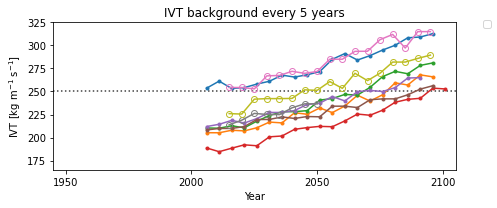

In [37]:
fig,ax = PP.subplots(figsize=(7,3))
labels = [r.split("_")[1] for r in runs if "85" in r]

# # Plot historical runs
# for i,f in enumerate(hFiles):
#     with xr.open_dataset(f) as fin:
#         x = [int(str(t).split("-")[0]) for t in fin.time.values]
#         if "cmip5" in f:
#             command = "ax.plot(x,fin.pSigma_3.values, '.-', label=labels[i])"
#         else:
#             command = "ax.plot(x,fin.pSigma_3.values, 'o-', mfc='none', label=labels[i])"
#         exec(command)

# Reset pyplot plot propierties cycle 
# ax.set_prop_cycle(None)
    
# Plot Future runs
for i,f in enumerate(fFiles):
    print(f)
    with xr.open_dataset(f) as fin:
        x = [int(str(t).split("-")[0]) for t in fin.time.values]
        if "cmip5" in f:
            command = "ax.plot(x,fin.pSigma_3.values, '.-')"
        else:
            command = "ax.plot(x,fin.pSigma_3.values, 'o-', mfc='none')"
        exec(command)

ax.set_xlabel("Year")
ax.set_ylabel(u"IVT [kg m$^{-1}$ s$^{-1}$]")
ax.set_title(u"IVT background every 5 years")
ax.legend(bbox_to_anchor=(1.1, 1.05))

years = np.arange(1950,2150,50)
ax.set_xticks(years)
ax.set_xticklabels(years)

ivts = np.arange(175,350,25)
ax.set_yticks(ivts)
ax.set_yticklabels(ivts)

ax.set_xlim(1945,2105)
ax.set_ylim(165,325)

x = np.arange(1945,2110,1,dtype="int")
ax.plot(x,np.zeros_like(x)+250, ":", c="black", alpha=0.75, zorder=0)
    
fig.tight_layout()
fig.show()


In [38]:
mv output/nc_cdf_pdf/*.BK output/


mv: cannot stat 'output/nc_cdf_pdf/*.BK': No such file or directory


In [39]:
f = xr.open_dataset("output/nc_cdf_pdf/ivt_bk_cmip5_IPSL-CM5A-LR_historical.nc")
f


<xarray.Dataset>
Dimensions:        (ivt: 5101, time: 11)
Coordinates:
  * ivt            (ivt) float64 -100.0 -99.0 -98.0 ... 4.999e+03 5e+03
  * time           (time) object 1950-01-01 00:00:00 ... 2000-01-01 00:00:00
Data variables: (12/32)
    pdf_1          (time, ivt) float64 ...
    cdf_1          (time, ivt) float64 ...
    mSigma_1       (time) float64 ...
    pSigma_1       (time) float64 ...
    mean_pdf_1     (ivt) float64 ...
    mean_cdf_1     (ivt) float64 ...
    ...             ...
    mSigma_4       (time) float64 ...
    pSigma_4       (time) float64 ...
    mean_pdf_4     (ivt) float64 ...
    mean_cdf_4     (ivt) float64 ...
    mean_mSigma_4  float64 ...
    mean_pSigma_4  float64 ...
Attributes:
    description:  IVT background field from cmip5_IPSL-CM5A-LR_historical

In [40]:
f.time


<xarray.DataArray 'time' (time: 11)>
array([cftime.DatetimeNoLeap(1950, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1955, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1960, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1965, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1970, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1975, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1985, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1950-01-01 00:00:00 ... 2000-01-01 00:00:00
Attributes:
    long_name:    5-year perdiod starting date
    description:  Analysis for every 5 years, this is the starting date of ea...

In [41]:
ivtbk_description


{1: 'Sample IVT from everywhere without filtering',
 2: 'Sample IVT without filtering, except where there ar ARs',
 3: 'Sample IVT from everywhere after filtering the equator using gaussian band',
 4: 'Sample IVT from places without AR after filtering the equator using gaussian band'}

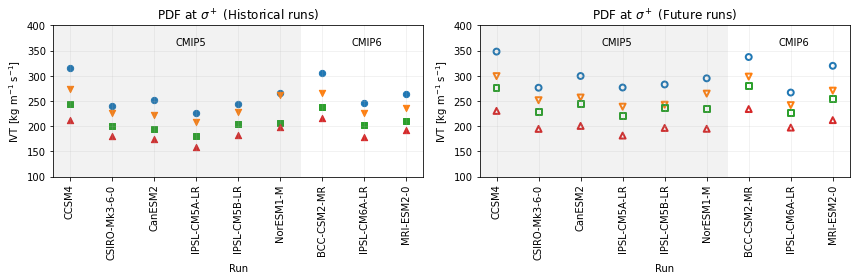

In [42]:
fig,axs = PP.subplots(1,2,figsize=(12,4))
ax0,ax1 = axs

ax0.scatter(hmf.realization, hmf.mean_pSigma_1.values, s=40, marker='o')
ax0.scatter(hmf.realization, hmf.mean_pSigma_2.values, s=40, marker='v')
ax0.scatter(hmf.realization, hmf.mean_pSigma_3.values, s=40, marker='s')
ax0.scatter(hmf.realization, hmf.mean_pSigma_4.values, s=40, marker='^')

ax1.scatter(fmf.realization, fmf.mean_pSigma_1.values, s=35, marker='o', facecolors='none', edgecolors="C0", linewidths=2)
ax1.scatter(fmf.realization, fmf.mean_pSigma_2.values, s=35, marker='v', facecolors='none', edgecolors="C1", linewidths=2)
ax1.scatter(fmf.realization, fmf.mean_pSigma_3.values, s=35, marker='s', facecolors='none', edgecolors="C2", linewidths=2)
ax1.scatter(fmf.realization, fmf.mean_pSigma_4.values, s=35, marker='^', facecolors='none', edgecolors="C3", linewidths=2)

for ax in axs:
    ax.set_xlabel("Run")
    ax.set_ylabel(u"IVT [kg m$^{-1}$ s$^{-1}$]")
    ax.set_ylim(100,400)
    ax.axhspan(0, 1000, 0, 0.67, facecolor="grey", alpha=0.1)
    ax.text(2.5,360, "CMIP5")
    ax.text(6.7,360, "CMIP6")
    ax.grid(alpha=.2)
    
labels0 = [r.split("_")[1] for r in runs if "historical" in r]
ax0.set_xticks(np.arange(len(labels0)))
ax0.set_xticklabels(labels0, rotation=90)
ax0.set_title(u"PDF at $\sigma^+$ (Historical runs)".format(bk))
    
labels1 = [r.split("_")[1] for r in runs if "85" in r]
ax1.set_xticks(np.arange(len(labels1)))
ax1.set_xticklabels(labels1, rotation=90)
ax1.set_title(u"PDF at $\sigma^+$ (Future runs)".format(bk))

fig.tight_layout()
fig.show()


In [43]:
print(hmf.mean_pSigma_3.mean(dim="realization").values)
print(fmf.mean_pSigma_3.mean(dim="realization").values)
      

208.89251808178085
244.07724326224596


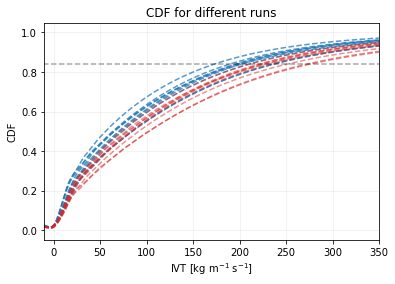

In [44]:
fig,ax = PP.subplots()

for r in hmf.realization.values:
    ax.plot(hmf.ivt, hmf.isel(realization=r).mean_cdf_3, c="C0", linestyle="--", alpha=.75)
    
for r in fmf.realization.values:
    ax.plot(fmf.ivt, fmf.isel(realization=r).mean_cdf_3, c="C3", linestyle="--", alpha=.5)

ax.plot(fmf.ivt, np.zeros_like(fmf.ivt)+0.84, c="k", ls="--", alpha=0.35)    
ax.set_xlim(-10,350)
ax.set_xlabel(u"IVT [kg m$^{-1}$ s$^{-1}$]")
ax.set_ylabel(u"CDF")
ax.set_title("CDF for different runs")
ax.grid(alpha=.2)
fig.show()


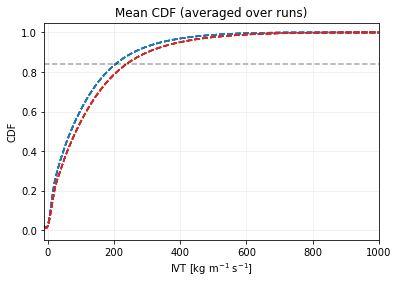

In [45]:
fig,ax = PP.subplots()

for r in hmf.realization.values:
    ax.plot(hmf.ivt, hmf.mean(dim="realization").mean_cdf_3, c="C0", linestyle="--", alpha=.75)
    
for r in fmf.realization.values:
    ax.plot(fmf.ivt, fmf.mean(dim="realization").mean_cdf_3, c="C3", linestyle="--", alpha=.75)

ax.plot(fmf.ivt, np.zeros_like(fmf.ivt)+0.84, c="k", ls="--", alpha=0.35)    
ax.set_xlim(-10,1000)
ax.set_xlabel(u"IVT [kg m$^{-1}$ s$^{-1}$]")
ax.set_ylabel(u"CDF")
ax.set_title("Mean CDF (averaged over runs)")
ax.grid(alpha=.2)
fig.show()


## Analysis to plan the figures for the article

##### List hypothesis and questions:

##### Try to set the figures that answer those

- Look for spread along models

- Do ars have different sizes across models?

- Explore change in ar size, length, etc with climate change

- How does background IVT field changes across models and between historical and future 

- Extra method, area where  ARCI>=-0.5, or ARCI>=0.67

- Extra method, add size from all single algorighms for tier2 (Travis' work)

- Is the channge in AR size is consistent with the differences across ivt background?

In [46]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as PP
import numpy as np
import sys
import glob
import cv2
import os
import xarray as xr
import cartopy.crs as ccrs
from scipy import interpolate
import gc 

%load_ext autoreload
%autoreload 2
from ARsize_cmip56_library import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
run = runs[0]
run


'cmip5_CCSM4_historical'

In [48]:
fName = "output/nc_cdf_pdf/{}.nc".format(run)
frun = xr.open_dataset(fName)
frun


<xarray.Dataset>
Dimensions:                   (ivt: 2001, pc: 20001, pContours: 5, stage: 19, widths: 1001, lengths: 1001, areas: 1001)
Coordinates:
  * pc                        (pc) float64 -1e+04 -9.999e+03 ... 9.999e+03 1e+04
  * ivt                       (ivt) float64 0.0 1.0 2.0 ... 1.999e+03 2e+03
  * pContours                 (pContours) float64 0.045 0.16 0.5 0.84 0.955
  * stage                     (stage) int64 5 10 15 20 25 30 ... 75 80 85 90 95
  * widths                    (widths) float64 0.0 10.0 20.0 ... 9.99e+03 1e+04
  * lengths                   (lengths) float64 0.0 10.0 20.0 ... 9.99e+03 1e+04
  * areas                     (areas) float64 0.0 1e+11 2e+11 ... 9.99e+13 1e+14
Data variables: (12/14)
    cdf_along_mean            (ivt, pc) float64 ...
    cdf_across_mean           (ivt, pc) float64 ...
    cdf_contours_along_mean   (pContours, pc) float64 ...
    cdf_contours_across_mean  (pContours, pc) float64 ...
    cdf_along                 (stage, ivt, pc) float64 ...
    cdf_across                (stage, ivt, pc) float64 ...
    ...                        ...
    pdf_width                 (stage, widths) float64 ...
    pdf_length                (stage, lengths) float64 ...
    pdf_area                  (stage, areas) float64 ...
    pdf_width_mean            (widths) float64 ...
    pdf_length_mean           (lengths) float64 ...
    pdf_area_mean             (areas) float64 ...
Attributes:
    description:  Calculated using the algorithms outlined in Inda-Diaz et al...

### SO-method


In [229]:
%%time

lengths_h = np.zeros(int(len(runs)/2))
lengths_f = np.zeros_like(lengths_h)
widths_h = np.zeros_like(lengths_h) 
widths_f = np.zeros_like(lengths_h)
areas_h = np.zeros_like(lengths_h) 
areas_f = np.zeros_like(lengths_h)

for i,run in enumerate(runs):
    j = int(i/2)
    if i%2==0:
        widths_h[j],lengths_h[j],areas_h[j] = calculate_SO(run, ivtbk=3, mean=False)
    else:
        widths_f[j],lengths_f[j],areas_f[j] = calculate_SO(run, ivtbk=3, mean=False)


CPU times: user 813 ms, sys: 201 ms, total: 1.01 s
Wall time: 8.85 s


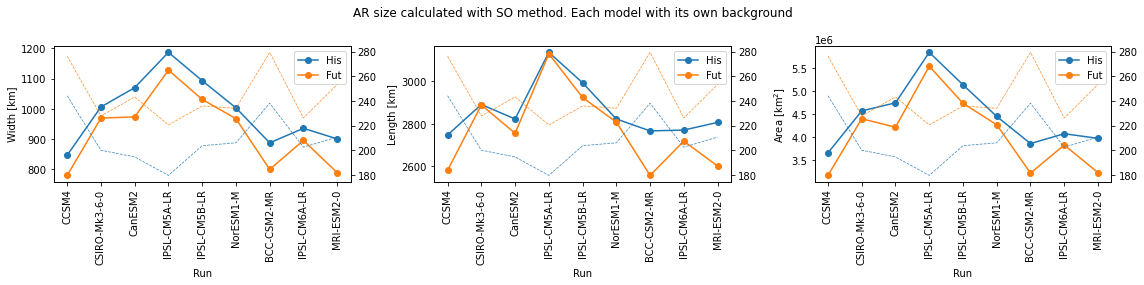

In [230]:
fig,axs = PP.subplots(1,3,figsize=(16,4))
ax0,ax1,ax2 = axs
labels = [r.split("_")[1] for r in runs if "historical" in r]
ylabels = [u"Width [km]", u"Length [km]", u"Area [km$^2$]"]

ax0.plot(widths_h, 'o-', label="His")
ax0.plot(widths_f, 'o-', label="Fut")

ax1.plot(lengths_h, 'o-', label="His")
ax1.plot(lengths_f, 'o-', label="Fut")

ax2.plot(areas_h, 'o-', label="His")
ax2.plot(areas_f, 'o-', label="Fut")

for ax,ylab in zip(axs,ylabels):
    ax.set_xlabel(u"Run")
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=90)
    ax.legend(loc=1)
    axt = ax.twinx()
    axt.plot(hmf.realization, hmf.mean_pSigma_3.values, ls="--", linewidth=0.75, alpha=.85)
    axt.plot(fmf.realization, fmf.mean_pSigma_3.values, ls="--", linewidth=0.75, alpha=.85)
    ax.set_ylabel(ylab)

fig.suptitle('AR size calculated with SO method. Each model with its own background')
fig.tight_layout()
fig.show()


In [231]:
""" Save data """

# sizes_SO_specificBK = [widths_h, widths_f, lengths_h, lengths_f, areas_h, areas_f]
sizes_SO_specificBK = [np.concatenate([ [wh, wf] for [wh, wf] in zip(widths_h, widths_f)]),\
                       np.concatenate([ [wh, wf] for [wh, wf] in zip(lengths_h, lengths_f)]),\
                       np.concatenate([ [wh, wf] for [wh, wf] in zip(areas_h, areas_f)])*1e6]


In [52]:
# %%time

# # lengths_h = np.zeros(int(len(runs)/2))
# # lengths_f = np.zeros_like(lengths_h)
# # widths_h = np.zeros_like(lengths_h) 
# # widths_f = np.zeros_like(lengths_h)
# # areas_h = np.zeros_like(lengths_h) 
# # areas_f = np.zeros_like(lengths_h)

# for i,run in enumerate(runs):
#     j = int(i/2)
#     if i%2==0:
        
#         dum1,dum2,dum3 = calculate_SO(run, ivtbk=3, mean=False, stage=50)
#         widths_h[j] = widths_h[j]  - dum1
#         lengths_h[j] = lengths_h[j] - dum2
#         areas_h[j] = areas_h[j] - dum3
#     else:
#         dum1,dum2,dum3 = calculate_SO(run, ivtbk=3, mean=False, stage=50)
#         widths_f[j] = widths_f[j] - dum1
#         lengths_f[j] = lengths_f[j] - dum2
#         areas_f[j] = areas_f[j] - dum3
        

In [53]:
# fig,axs = PP.subplots(1,3,figsize=(16,4))
# ax0,ax1,ax2 = axs
# labels = [r.split("_")[1] for r in runs if "historical" in r]
# ylabels = [u"Width [km]", u"Length [km]", u"Area [km$^2$]"]

# ax0.plot(widths_h, 'o-', label="His")
# ax0.plot(widths_f, 'o-', label="Fut")

# ax1.plot(lengths_h, 'o-', label="His")
# ax1.plot(lengths_f, 'o-', label="Fut")

# ax2.plot(areas_h, 'o-', label="His")
# ax2.plot(areas_f, 'o-', label="Fut")

# for ax,ylab in zip(axs,ylabels):
#     ax.set_xlabel(u"Run")
#     ax.set_xticks(np.arange(len(labels)))
#     ax.set_xticklabels(labels, rotation=90)
#     ax.legend(loc=1)
#     axt = ax.twinx()
#     axt.plot(hmf.realization, hmf.mean_pSigma_3.values, ls="--", linewidth=0.75, alpha=.85)
#     axt.plot(fmf.realization, fmf.mean_pSigma_3.values, ls="--", linewidth=0.75, alpha=.85)
#     ax.set_ylabel(ylab)

# fig.tight_layout()
# fig.suptitle('AR size calculated with SO method. Each model with its own background')
# fig.show()


In [232]:
lengths_h = np.zeros(int(len(runs)/2))
lengths_f = np.zeros_like(lengths_h)
widths_h = np.zeros_like(lengths_h) 
widths_f = np.zeros_like(lengths_h)
areas_h = np.zeros_like(lengths_h) 
areas_f = np.zeros_like(lengths_h)

for i,run in enumerate(runs):
    j = int(i/2)
    if i%2==0:
        widths_h[j],lengths_h[j],areas_h[j] = calculate_SO(run, ivtbk=3, mean=True)
    else:
        widths_f[j],lengths_f[j],areas_f[j] = calculate_SO(run, ivtbk=3, mean=True)


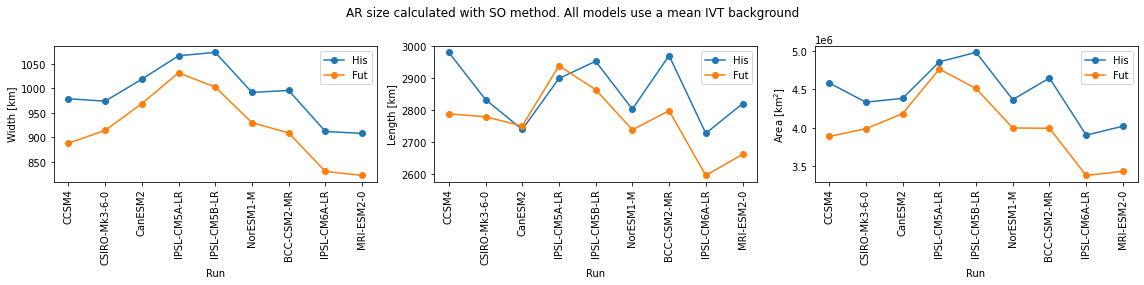

In [233]:
fig,axs = PP.subplots(1,3,figsize=(16,4))
ax0,ax1,ax2 = axs
labels = [r.split("_")[1] for r in runs if "historical" in r]
ylabels = [u"Width [km]", u"Length [km]", u"Area [km$^2$]"]

ax0.plot(widths_h, 'o-', label="His")
ax0.plot(widths_f, 'o-', label="Fut")

ax1.plot(lengths_h, 'o-', label="His")
ax1.plot(lengths_f, 'o-', label="Fut")

ax2.plot(areas_h, 'o-', label="His")
ax2.plot(areas_f, 'o-', label="Fut")

for ax,ylab in zip(axs,ylabels):
    ax.set_xlabel(u"Run")
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=90)
    ax.legend(loc=1)
    ax.set_ylabel(ylab)

fig.suptitle('AR size calculated with SO method. All models use a mean IVT background')
fig.tight_layout()
fig.show()


In [234]:
# sizes_SO_meanBK = [widths_h, widths_f, lengths_h, lengths_f, areas_h, areas_f]
sizes_SO_meanBK = [np.concatenate([ [wh, wf] for [wh, wf] in zip(widths_h, widths_f)]),\
                   np.concatenate([ [wh, wf] for [wh, wf] in zip(lengths_h, lengths_f)]),\
                   np.concatenate([ [wh, wf] for [wh, wf] in zip(areas_h, areas_f)])*1e6]


In [235]:
##### lengths_h = np.zeros(int(len(runs)/2))
lengths_f = np.zeros_like(lengths_h)
widths_h = np.zeros_like(lengths_h) 
widths_f = np.zeros_like(lengths_h)
areas_h = np.zeros_like(lengths_h) 
areas_f = np.zeros_like(lengths_h)

for i,run in enumerate(runs):
    j = int(i/2)
    if i%2==0:
        widths_h[j],lengths_h[j],areas_h[j] = calculate_SO(run, ivtFixed=250)
    else:
        widths_f[j],lengths_f[j],areas_f[j] = calculate_SO(run, ivtFixed=250)
        

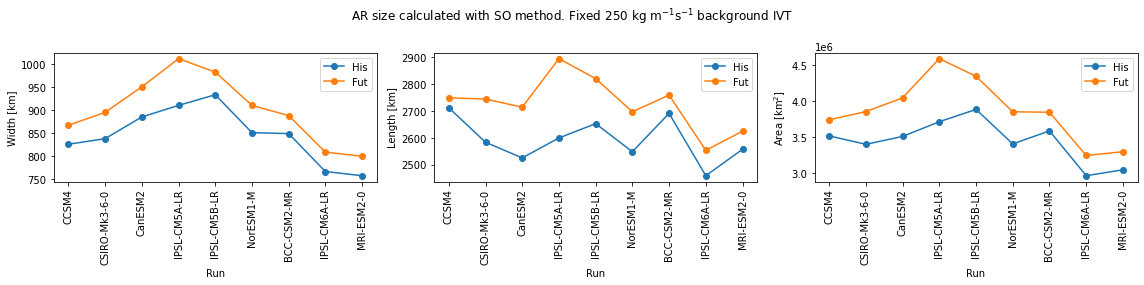

In [236]:
fig,axs = PP.subplots(1,3,figsize=(16,4))
ax0,ax1,ax2 = axs
labels = [r.split("_")[1] for r in runs if "historical" in r]
ylabels = [u"Width [km]", u"Length [km]", u"Area [km$^2$]"]

ax0.plot(widths_h, 'o-', label="His")
ax0.plot(widths_f, 'o-', label="Fut")

ax1.plot(lengths_h, 'o-', label="His")
ax1.plot(lengths_f, 'o-', label="Fut")

ax2.plot(areas_h, 'o-', label="His")
ax2.plot(areas_f, 'o-', label="Fut")

for ax,ylab in zip(axs,ylabels):
    ax.set_xlabel(u"Run")
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=90)
    ax.legend(loc=1)
    ax.set_ylabel(ylab)

fig.suptitle('AR size calculated with SO method. Fixed 250 kg m$^{-1}$s$^{-1}$ background IVT')
fig.tight_layout()
fig.show()


In [237]:
# sizes_SO_250 = [widths_h, widths_f, lengths_h, lengths_f, areas_h, areas_f]
sizes_SO_250 = [np.concatenate([ [wh, wf] for [wh, wf] in zip(widths_h, widths_f)]),\
                np.concatenate([ [wh, wf] for [wh, wf] in zip(lengths_h, lengths_f)]),\
                np.concatenate([ [wh, wf] for [wh, wf] in zip(areas_h, areas_f)])*1e6]


In [60]:
try:
    del(f,ivt,x,cdfal,cdfac,bk,cdfbk,ivtbk)
except:
    pass
gc.collect()


831

### KS-test method

In [298]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as PP
import numpy as np
import sys
import glob
import cv2
import os
import xarray as xr
import cartopy.crs as ccrs
from scipy import interpolate
import gc 

%load_ext autoreload
%autoreload 2
from ARsize_cmip56_library import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [299]:
""" Load CPD of IVT with distance """

run = runs[6]
print(run)
fName = "output/nc_cdf_pdf/{}.nc".format(run)
f = xr.open_dataset(fName)
ivt = f.ivt.values
x = f.pc.values
cdfal = f.cdf_along_mean.values
cdfac = f.cdf_across_mean.values


cmip5_IPSL-CM5A-LR_historical


In [300]:
""" Load Background IVT CDF """

fName = "output/nc_cdf_pdf/ivt_bk_{}.nc".format(run)
bk = xr.open_dataset(fName)
cdfbk = bk.mean_cdf_1.values
ivtbk = bk.ivt


In [326]:
xs_ls, ks_ls, pv_ls = compare_cdf2BK(x, ivt, cdfal , ivtbk, cdfbk, alt="less", mode="auto", subsample=10)
xs_2s, ks_2s, pv_2s = compare_cdf2BK(x, ivt, cdfal , ivtbk, cdfbk, alt="two-sided", mode="auto", subsample=10)


In [327]:
# PP.scatter(xs_2s, ks_2s)

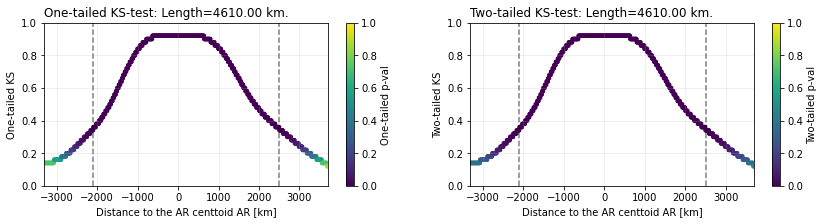

In [328]:
plot_kst_final(xs_ls, ks_ls, pv_ls, xs_2s, ks_2s, pv_2s, Length="Length")


In [329]:
xs_ls, ks_ls, pv_ls = compare_cdf2BK(x, ivt, cdfac , ivtbk, cdfbk, alt="less", mode="auto", subsample=10)
xs_2s, ks_2s, pv_2s = compare_cdf2BK(x, ivt, cdfac , ivtbk, cdfbk, alt="two-sided", mode="auto", subsample=10)


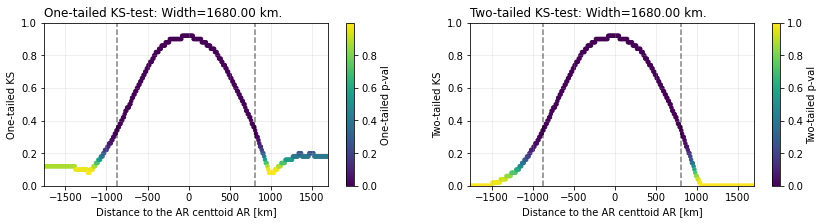

In [330]:
plot_kst_final(xs_ls, ks_ls, pv_ls, xs_2s, ks_2s, pv_2s, Length="Width")


In [331]:
a = np.array([0.20,0.15,0.10,0.05,0.025,0.01,0.005,0.001])
c = np.array([1.073,1.138,1.224,1.358,1.48,1.628,1.731,1.949])

m = 5e2
n = 5e2
D = np.sqrt(-1*np.log(a/2)*(1+m/n)/(2*m))
D


array([0.0678614 , 0.07197593, 0.07740455, 0.08589388, 0.09361652,
       0.10293996, 0.10946657, 0.1232956 ])

In [333]:
m = 50
n = 50
D = np.sqrt(-1*np.log(a/2)*(1+m/n)/(2*m))
D

array([0.2145966 , 0.22760787, 0.24477468, 0.2716203 , 0.29604144,
       0.32552473, 0.34616368, 0.38989492])

In [65]:
""" Calculate BK method for all runs """

lengths2_h = np.zeros(int(len(runs)/2))
lengths2_f = np.zeros_like(lengths2_h)
widths2_h = np.zeros_like(lengths2_h) 
widths2_f = np.zeros_like(lengths2_h)
areas2_h = np.zeros_like(lengths2_h) 
areas2_f = np.zeros_like(lengths2_h)

lengthsL_h = np.zeros_like(lengths2_h)
lengthsL_f = np.zeros_like(lengths2_h)
widthsL_h = np.zeros_like(lengths2_h) 
widthsL_f = np.zeros_like(lengths2_h)
areasL_h = np.zeros_like(lengths2_h) 
areasL_f = np.zeros_like(lengths2_h)

lengths = []


In [66]:
%%time

""" Calculate BK method for all runs """

lengths = []

for i,run in enumerate(runs):

    j = int(i/2)
    print(run)
    if i%2==0:
        (widthsL_h[j],lengthsL_h[j],areasL_h[j]),\
        (widths2_h[j],lengths2_h[j],areas2_h[j]) = calculate_BK(run, subsample=10, ivtbk=1)
    else:
        (widthsL_f[j],lengthsL_f[j],areasL_f[j]),\
        (widths2_f[j],lengths2_f[j],areas2_f[j]) = calculate_BK(run, subsample=10, ivtbk=1)



cmip5_CCSM4_historical
cmip5_CCSM4_rcp85
cmip5_CSIRO-Mk3-6-0_historical
cmip5_CSIRO-Mk3-6-0_rcp85
cmip5_CanESM2_historical
cmip5_CanESM2_rcp85
cmip5_IPSL-CM5A-LR_historical
cmip5_IPSL-CM5A-LR_rcp85
cmip5_IPSL-CM5B-LR_historical
cmip5_IPSL-CM5B-LR_rcp85
cmip5_NorESM1-M_historical
cmip5_NorESM1-M_rcp85
cmip6_BCC-CSM2-MR_historical
cmip6_BCC-CSM2-MR_ssp585
cmip6_IPSL-CM6A-LR_historical
cmip6_IPSL-CM6A-LR_ssp585
cmip6_MRI-ESM2-0_historical
cmip6_MRI-ESM2-0_ssp585
CPU times: user 1min 58s, sys: 16.1 s, total: 2min 14s
Wall time: 2min 24s


In [67]:
# fig,axs = PP.subplots(1,3,figsize=(16,4))
# ax0,ax1,ax2 = axs
# labels = [r.split("_")[1] for r in runs if "historical" in r]
# ylabels = [u"Width [km]", u"Length [km]", u"Area [km$^2$]"]

# ax0.plot(widths2_h, 'o-', label="His")
# ax0.plot(widths2_f, 'o--', label="Fut")

# ax1.plot(lengths2_h, 'o-', label="His")
# ax1.plot(lengths2_f, 'o--', label="Fut")

# ax2.plot(areas2_h, 'o-', label="His")
# ax2.plot(areas2_f, 'o--', label="Fut")

# for ax,ylab in zip(axs,ylabels):
#     ax.set_xlabel(u"Run")
#     ax.set_xticks(np.arange(len(labels)))
#     ax.set_xticklabels(labels, rotation=90)
#     ax.legend(loc=1)
#     ax.set_ylabel(ylab)

# fig.tight_layout()
# fig.suptitle('AR size calculated with KS-test method')
# fig.show()


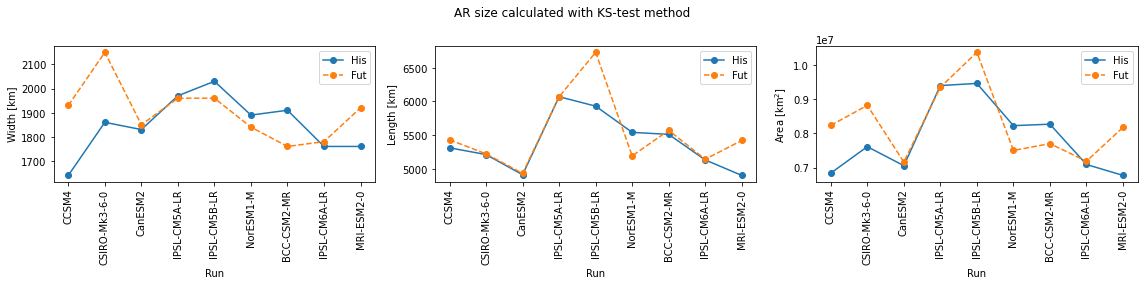

In [222]:
fig,axs = PP.subplots(1,3,figsize=(16,4))
ax0,ax1,ax2 = axs
labels = [r.split("_")[1] for r in runs if "historical" in r]
ylabels = [u"Width [km]", u"Length [km]", u"Area [km$^2$]"]

ax0.plot(widthsL_h, 'o-', label="His")
ax0.plot(widthsL_f, 'o--', label="Fut")

ax1.plot(lengthsL_h, 'o-', label="His")
ax1.plot(lengthsL_f, 'o--', label="Fut")

ax2.plot(areasL_h, 'o-', label="His")
ax2.plot(areasL_f, 'o--', label="Fut")

for ax,ylab in zip(axs,ylabels):
    ax.set_xlabel(u"Run")
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=90)
    ax.legend(loc=1)
    ax.set_ylabel(ylab)

fig.suptitle('AR size calculated with KS-test method')
fig.tight_layout()
fig.show()


In [218]:
# sizes_BK = [widthsL_h, widthsL_f, lengthsL_h, lengthsL_f, areasL_h, areasL_f]
sizes_BK = [np.concatenate([ [wh, wf] for [wh, wf] in zip(widthsL_h, widthsL_f)]),\
            np.concatenate([ [wh, wf] for [wh, wf] in zip(lengthsL_h, lengthsL_f)]),\
            np.concatenate([ [wh, wf] for [wh, wf] in zip(areasL_h, areasL_f)])*1e6]


In [70]:
del(widths2_h, widths2_f, lengths2_h, lengths2_f, areas2_h, areas2_f)
del(widthsL_h, widthsL_f, lengthsL_h, lengthsL_f, areasL_h, areasL_f)
gc.collect()


11029

### ARCI areas


In [71]:
f = xr.open_dataset("output/arciAreas/cmip6_IPSL-CM6A-LR_ssp585.ARCI.areas.nc")
f


<xarray.Dataset>
Dimensions:  (time: 58439, lat: 143, lon: 144, dim_count: 1, dim_areas: 128)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T06:00:00 ... 2054-12-31T18:00:00
  * lat      (lat) float64 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: dim_count, dim_areas
Data variables:
    count    (time, dim_count) float64 ...
    areas    (time, dim_areas) float64 ...
Attributes:
    TECA_version:   4.1.0
    TECA_app_name:  python3.8

In [72]:
cellArea(f.lat,f.lon)


24770730987.962704

In [73]:
areas = f.areas.values.ravel()
isNotNaN = np.logical_not(np.isnan(areas))
areas = areas[isNotNaN]
areas = areas*1e6

isAR = areas>6*cellArea(f.lat,f.lon)
areas = areas[isAR]


1.49e+11


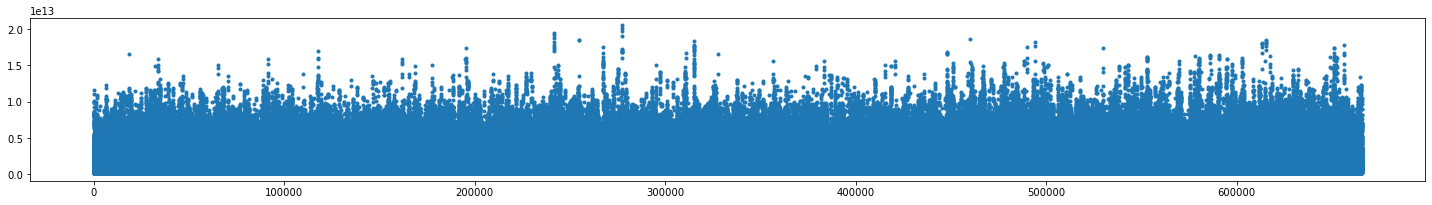

In [74]:
fig,ax = PP.subplots(figsize=(25,3))

ax.plot(areas,'.')
print("{:.2e}".format(np.min(areas)))
# ax.plot(np.arange(len(areas)), np.ones_like(areas)*cellArea(f.lat,f.lon),'--')


In [75]:
x, pdf, cdf, mSigma, pSigma =  calculate_ivt_pdfs(areas)#, numPoints=513)
print(len(x))


257


(-100000000000.0, 10000000000000.0)

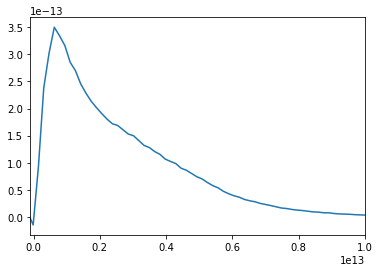

In [76]:
fig,ax = PP.subplots()

ax.plot(x, pdf)
# ax.set_xscale("log")
ax.set_xlim(-1e11,1e13)


In [77]:
%%time

x050, pdf050, cdf050, mS050, pS050, med050 = {},{},{},{},{},{}
Areas = {}

for run in runs:
    f = xr.open_dataset("output/arciAreas/{}.ARCI.areas.nc".format(run))
    areas = f.areas.values.ravel()
    isNotNaN = np.logical_not(np.isnan(areas))
    areas = areas[isNotNaN]
    areas = areas*1e6

    isAR = areas>6*cellArea(f.lat,f.lon)
    areas = areas[isAR]
    med050[run] = np.percentile(areas,50)
    Areas[run] = areas
    
    x050[run], pdf050[run], cdf050[run], mS050[run], pS050[run] =  calculate_ivt_pdfs(areas)
    

CPU times: user 18.8 s, sys: 2.44 s, total: 21.2 s
Wall time: 24.5 s


(-100000000000.0, 10000000000000.0)

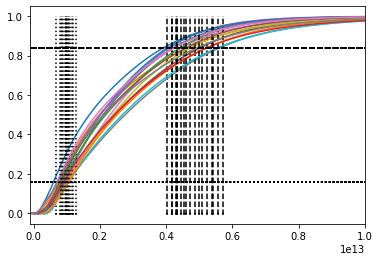

In [78]:
fig,ax = PP.subplots()

for run in runs:

    x,pdf,cdf,mS,pS = x050[run],pdf050[run],cdf050[run],mS050[run],pS050[run]
    ax.plot(x,cdf)
    ax.plot(np.ones_like(cdf)*mS, cdf,':k')
    ax.plot(x,np.ones_like(x)*0.16, ':k')
    ax.plot(np.ones_like(cdf)*pS, cdf,'--k')
    ax.plot(x,np.ones_like(x)*0.84, '--k')
    # break
ax.set_xlim(-1e11,1e13)
   

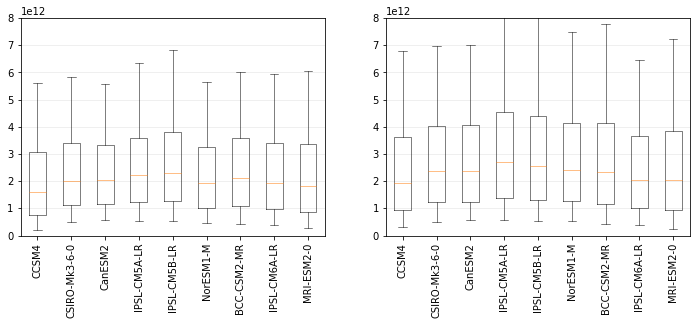

In [79]:
fig,axs = PP.subplots(1,2,figsize=(12,4))
ax0,ax1 = axs

""" Box-plots properties """
labels = [r.split("_")[1] for r in runs if "historical" in r]

boxprops = dict(linestyle='-', linewidth=0.5)
medianprops = dict(linestyle='-', linewidth=0.5)
capprops = dict(linestyle='-', linewidth=0.5)
whiskerprops = dict(linestyle='-', linewidth=0.5)

bp = ax0.boxplot([Areas[run] for run in runs[::2]], sym='', whis=[5, 95], \
                boxprops=boxprops, medianprops=medianprops, capprops=capprops, \
                whiskerprops=whiskerprops)
lb = ax0.set_xticklabels(labels, rotation=90)

bp = ax1.boxplot([Areas[run] for run in runs[1::2]], sym='', whis=[5, 95], \
                boxprops=boxprops, medianprops=medianprops, capprops=capprops, \
                whiskerprops=whiskerprops)
lb = ax1.set_xticklabels(labels, rotation=90)

for ax in axs:
    ax.set_ylim(0,8e12)
    ax.grid(alpha=0.25, axis='y')
    
    

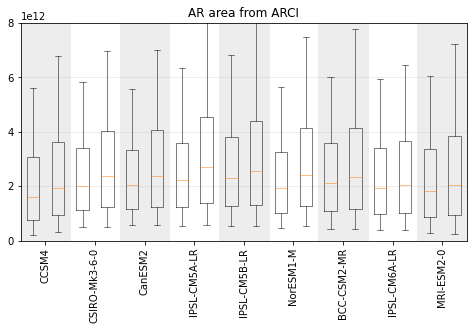

In [80]:
fig,ax = PP.subplots(figsize=(8,4))

""" Box-plots properties """
labels = [r.split("_")[1] for r in runs if "historical" in r]

boxprops = dict(linestyle='-', linewidth=0.5)
medianprops = dict(linestyle='-', linewidth=0.5)
capprops = dict(linestyle='-', linewidth=0.5)
whiskerprops = dict(linestyle='-', linewidth=0.5)

bp = ax.boxplot([Areas[run] for run in runs], sym='', whis=[5, 95], \
                boxprops=boxprops, medianprops=medianprops, capprops=capprops, \
                whiskerprops=whiskerprops)
lb = ax.set_xticks(np.arange(1.5,len(runs),2))
lb = ax.set_xticklabels(labels, rotation=90)
lb = ax.set_yticks(np.arange(0,10,2)*1e12)

ax.set_ylim(0,8e12)
ax.grid(alpha=0.25, axis='y')

y0,y1 = ax.get_ylim()
for t in np.arange(1.5,len(runs),4):
    ax.fill_between([t-1, t+1], [y1,y1], color="lightgrey", alpha=0.4, linewidth=0.6)

ax.set_title("AR area from ARCI")
# fig.tight_layout()
fig.show()


In [81]:
sizes_ARCI = [np.array([i for i in med050.values()]), np.array([i for i in mS050.values()]), np.array([i for i in pS050.values()])]


In [238]:
import pickle as pk

with open('output/results/sizes.pkl', 'wb') as f:
    pk.dump([sizes_ARCI, sizes_BK, sizes_SO_250, sizes_SO_meanBK, sizes_SO_specificBK], f, protocol=pk.HIGHEST_PROTOCOL)

gc.collect()
    
with open('output/results/sizes.pkl', 'rb') as f:
    [sizes_ARCI, sizes_BK, sizes_SO_250, sizes_SO_meanBK, sizes_SO_specificBK] = pk.load(f)


In [107]:
""" Save sizes from PC method """

f = xr.open_dataset("output/nc_cdf_pdf/cmip5_CanESM2_historical.nc")
print(f)


<xarray.Dataset>
Dimensions:                   (ivt: 2001, pc: 20001, pContours: 5, stage: 19, widths: 1001, lengths: 1001, areas: 1001)
Coordinates:
  * pc                        (pc) float64 -1e+04 -9.999e+03 ... 9.999e+03 1e+04
  * ivt                       (ivt) float64 0.0 1.0 2.0 ... 1.999e+03 2e+03
  * pContours                 (pContours) float64 0.045 0.16 0.5 0.84 0.955
  * stage                     (stage) int64 5 10 15 20 25 30 ... 75 80 85 90 95
  * widths                    (widths) float64 0.0 10.0 20.0 ... 9.99e+03 1e+04
  * lengths                   (lengths) float64 0.0 10.0 20.0 ... 9.99e+03 1e+04
  * areas                     (areas) float64 0.0 1e+11 2e+11 ... 9.99e+13 1e+14
Data variables: (12/14)
    cdf_along_mean            (ivt, pc) float64 ...
    cdf_across_mean           (ivt, pc) float64 ...
    cdf_contours_along_mean   (pContours, pc) float64 ...
    cdf_contours_across_mean  (pContours, pc) float64 ...
    cdf_along                 (stage, ivt, pc) floa

In [188]:
widths_med, widths_mS, widths_pS = [],[],[]
lengths_med, lengths_mS, lengths_pS = [],[],[]
areas_med, areas_mS, areas_pS = [],[],[]

for run in runs:
    print(run)
    f = xr.open_dataset("output/nc_cdf_pdf/{}.nc".format(run))
    med,ms,ps = median_sigmas(f.widths, f.pdf_width_mean)
    widths_med.append(med)
    widths_mS.append(ms)
    widths_pS.append(ps)

    med,ms,ps = median_sigmas(f.lengths, f.pdf_length_mean)
    lengths_med.append(med)
    lengths_mS.append(ms)
    lengths_pS.append(ps)
    
    f = xr.open_dataset("output/runs/{}.nc".format(run))
    areas = f.area.values[np.logical_not(np.isnan(f.area.values))]*1e6
    pdf,x = fastKDE.pdf(areas)
    med,ms,ps = median_sigmas(x, pdf)
    areas_med.append(med)
    areas_mS.append(ms)
    areas_pS.append(ps)
    

cmip5_CCSM4_historical
cmip5_CCSM4_rcp85
cmip5_CSIRO-Mk3-6-0_historical
cmip5_CSIRO-Mk3-6-0_rcp85
cmip5_CanESM2_historical
cmip5_CanESM2_rcp85
cmip5_IPSL-CM5A-LR_historical
cmip5_IPSL-CM5A-LR_rcp85
cmip5_IPSL-CM5B-LR_historical
cmip5_IPSL-CM5B-LR_rcp85
cmip5_NorESM1-M_historical
cmip5_NorESM1-M_rcp85
cmip6_BCC-CSM2-MR_historical
cmip6_BCC-CSM2-MR_ssp585
cmip6_IPSL-CM6A-LR_historical
cmip6_IPSL-CM6A-LR_ssp585
cmip6_MRI-ESM2-0_historical
cmip6_MRI-ESM2-0_ssp585


In [189]:
sizes_PC = [widths_med, widths_mS, widths_pS, lengths_med, lengths_mS, lengths_pS,areas_med, areas_mS, areas_pS]


In [220]:
import pickle as pk

with open('output/results/sizes.pkl', 'wb') as f:
    pk.dump([sizes_PC, sizes_ARCI, sizes_BK, sizes_SO_250, sizes_SO_meanBK, sizes_SO_specificBK], f, protocol=pk.HIGHEST_PROTOCOL)

gc.collect()
    
with open('output/results/sizes.pkl', 'rb') as f:
    [sizes_PC, sizes_ARCI, sizes_BK, sizes_SO_250, sizes_SO_meanBK, sizes_SO_specificBK] = pk.load(f)


In [191]:
del(widths_med, widths_mS, widths_pS, lengths_med, lengths_mS, lengths_pS,areas_med, areas_mS, areas_pS)
gc.collect()


1852

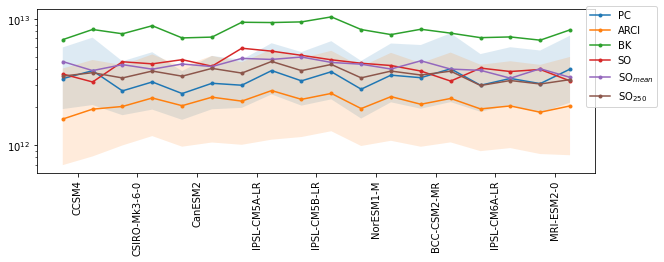

In [248]:
fig,ax = PP.subplots(figsize=(10,3))

ax.plot(runs, sizes_PC[-3],'.-', label="PC")
ax.fill_between(runs, sizes_PC[-2], sizes_PC[-1], alpha=0.15)

ax.plot(runs, sizes_ARCI[-3],'.-', label="ARCI")
ax.fill_between(runs, sizes_ARCI[-2], sizes_ARCI[-1], alpha=0.15)

ax.plot(runs, sizes_BK[-1],'.-', label="BK")

ax.plot(runs, sizes_SO_specificBK[-1],'.-', label="SO")
ax.plot(runs, sizes_SO_meanBK[-1],'.-', label=u"SO$_{mean}$")
ax.plot(runs, sizes_SO_250[-1],'.-', label=u"SO$_{250}$")

labels = [r.split("_")[1] for r in runs if "historical" in r]
lb = ax.set_xticks(np.arange(0.5,len(runs),2))
lb = ax.set_xticklabels(labels, rotation=90)

ax.set_yscale("log")
ax.legend(bbox_to_anchor=(1.12, 1.05))


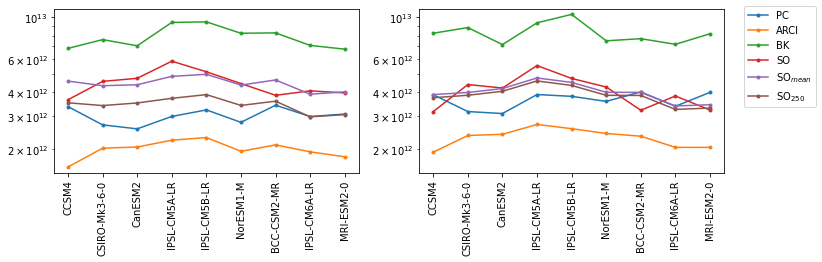

In [275]:
fig,axs = PP.subplots(1,2,figsize=(12,3))
ax0,ax1 = axs

#----------------------------------------------------------------------------------------------
ax0.plot(runs[::2], sizes_PC[-3][::2],'.-', label="PC")
# ax0.fill_between(runs[::2], sizes_PC[-2][::2], sizes_PC[-1][::2], alpha=0.15)

ax0.plot(runs[::2], sizes_ARCI[-3][::2],'.-', label="ARCI")
# ax0.fill_between(runs[::2], sizes_ARCI[-2][::2], sizes_ARCI[-1][::2], alpha=0.15)

ax0.plot(runs[::2], sizes_BK[-1][::2],'.-', label="BK")

ax0.plot(runs[::2], sizes_SO_specificBK[-1][::2],'.-', label="SO")
ax0.plot(runs[::2], sizes_SO_meanBK[-1][::2],'.-', label=u"SO$_{mean}$")
ax0.plot(runs[::2], sizes_SO_250[-1][::2],'.-', label=u"SO$_{250}$")
#----------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------
ax1.plot(runs[1::2], sizes_PC[-3][1::2],'.-', label="PC")
# ax1.fill_between(runs[1::2], sizes_PC[-2][1::2], sizes_PC[-1][::2], alpha=0.15)

ax1.plot(runs[1::2], sizes_ARCI[-3][1::2],'.-', label="ARCI")
# ax1.fill_between(runs[1::2], sizes_ARCI[-2][1::2], sizes_ARCI[-1][::2], alpha=0.15)

ax1.plot(runs[1::2], sizes_BK[-1][1::2],'.-', label="BK")

ax1.plot(runs[1::2], sizes_SO_specificBK[-1][1::2],'.-', label="SO")
ax1.plot(runs[1::2], sizes_SO_meanBK[-1][1::2],'.-', label=u"SO$_{mean}$")
ax1.plot(runs[1::2], sizes_SO_250[-1][1::2],'.-', label=u"SO$_{250}$")
#----------------------------------------------------------------------------------------------

for ax in axs:
    labels = [r.split("_")[1] for r in runs if "historical" in r]
    lb = ax.set_xticks(np.arange(0,len(runs)/2,1))
    lb = ax.set_xticklabels(labels, rotation=90)

    ax.set_yscale("log")
    ax.set_ylim(1.5e12,1.1e13)
ax1.legend(bbox_to_anchor=(1.05, 1.05))


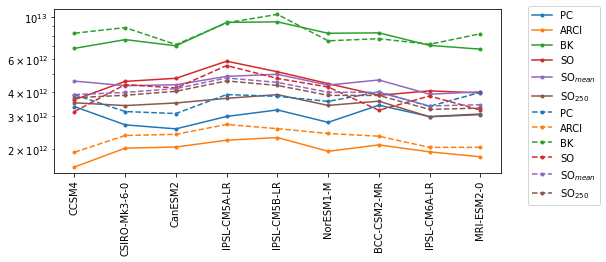

In [281]:
fig,ax = PP.subplots(figsize=(8,3))
ax0 = ax
ax1 = ax
axs=(ax0,ax1)
#----------------------------------------------------------------------------------------------
ax0.plot(runs[::2], sizes_PC[-3][::2],'.-', label="PC")
# ax0.fill_between(runs[::2], sizes_PC[-2][::2], sizes_PC[-1][::2], alpha=0.15)

ax0.plot(runs[::2], sizes_ARCI[-3][::2],'.-', label="ARCI")
# ax0.fill_between(runs[::2], sizes_ARCI[-2][::2], sizes_ARCI[-1][::2], alpha=0.15)

ax0.plot(runs[::2], sizes_BK[-1][::2],'.-', label="BK")

ax0.plot(runs[::2], sizes_SO_specificBK[-1][::2],'.-', label="SO")
ax0.plot(runs[::2], sizes_SO_meanBK[-1][::2],'.-', label=u"SO$_{mean}$")
ax0.plot(runs[::2], sizes_SO_250[-1][::2],'.-', label=u"SO$_{250}$")
#----------------------------------------------------------------------------------------------
# Reset pyplot plot propierties cycle 
ax.set_prop_cycle(None)
#----------------------------------------------------------------------------------------------
ax1.plot(runs[::2], sizes_PC[-3][1::2],'.--', label="PC")
# ax1.fill_between(runs[1::2], sizes_PC[-2][1::2], sizes_PC[-1][::2], alpha=0.15)

ax1.plot(runs[::2], sizes_ARCI[-3][1::2],'.--', label="ARCI")
# ax1.fill_between(runs[1::2], sizes_ARCI[-2][1::2], sizes_ARCI[-1][::2], alpha=0.15)

ax1.plot(runs[::2], sizes_BK[-1][1::2],'.--', label="BK")

ax1.plot(runs[::2], sizes_SO_specificBK[-1][1::2],'.--', label="SO")
ax1.plot(runs[::2], sizes_SO_meanBK[-1][1::2],'.--', label=u"SO$_{mean}$")
ax1.plot(runs[::2], sizes_SO_250[-1][1::2],'.--', label=u"SO$_{250}$")
#----------------------------------------------------------------------------------------------

for ax in axs:
    labels = [r.split("_")[1] for r in runs if "historical" in r]
    lb = ax.set_xticks(np.arange(0,len(runs)/2,1))
    lb = ax.set_xticklabels(labels, rotation=90)

    ax.set_yscale("log")
    ax.set_ylim(1.5e12,1.1e13)
ax1.legend(bbox_to_anchor=(1.05, 1.05))


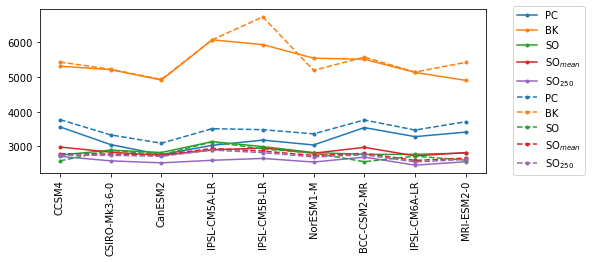

In [282]:
fig,ax = PP.subplots(figsize=(8,3))
ax0 = ax
ax1 = ax
axs=(ax0,ax1)
#----------------------------------------------------------------------------------------------
ax0.plot(runs[::2], sizes_PC[-6][::2],'.-', label="PC")
# ax0.fill_between(runs[::2], sizes_PC[-2][::2], sizes_PC[-1][::2], alpha=0.15)

ax0.plot(runs[::2], sizes_BK[-2][::2],'.-', label="BK")

ax0.plot(runs[::2], sizes_SO_specificBK[-2][::2],'.-', label="SO")
ax0.plot(runs[::2], sizes_SO_meanBK[-2][::2],'.-', label=u"SO$_{mean}$")
ax0.plot(runs[::2], sizes_SO_250[-2][::2],'.-', label=u"SO$_{250}$")
#----------------------------------------------------------------------------------------------
# Reset pyplot plot propierties cycle 
ax.set_prop_cycle(None)
#----------------------------------------------------------------------------------------------
ax1.plot(runs[::2], sizes_PC[-6][1::2],'.--', label="PC")
# ax1.fill_between(runs[1::2], sizes_PC[-2][1::2], sizes_PC[-1][::2], alpha=0.15)

ax1.plot(runs[::2], sizes_BK[-2][1::2],'.--', label="BK")

ax1.plot(runs[::2], sizes_SO_specificBK[-2][1::2],'.--', label="SO")
ax1.plot(runs[::2], sizes_SO_meanBK[-2][1::2],'.--', label=u"SO$_{mean}$")
ax1.plot(runs[::2], sizes_SO_250[-2][1::2],'.--', label=u"SO$_{250}$")
#----------------------------------------------------------------------------------------------

for ax in axs:
    labels = [r.split("_")[1] for r in runs if "historical" in r]
    lb = ax.set_xticks(np.arange(0,len(runs)/2,1))
    lb = ax.set_xticklabels(labels, rotation=90)

    # ax.set_yscale("log")
    # ax.set_ylim(1.5e12,1.1e13)
ax1.legend(bbox_to_anchor=(1.05, 1.05))


In [130]:
f = xr.open_dataset("output/runs/cmip5_CCSM4_historical.nc")
print(f.area)


<xarray.DataArray 'area' (track_id: 11208183)>
[11208183 values with dtype=float64]
Coordinates:
  * track_id  (track_id) int32 0 0 0 0 0 ... 311186 311186 311186 311186 311186


11208183
307582
36684488943803.81 67762108614.18604 3854296266541.6143


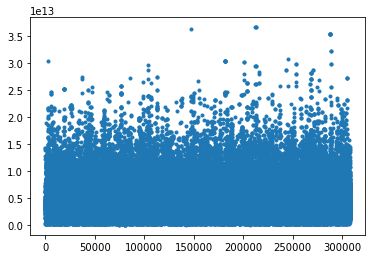

In [180]:
print(len(f.area))
area = f.area.values[np.logical_not(np.isnan(f.area.values))]*1e6
# area = f.length.values[np.logical_not(np.isnan(f.length.values))]
PP.plot(area,'.')
print(len(area))
print(np.max(area),np.min(area),np.mean(area))


In [185]:
fkde = fastKDE.fastKDE(area)
pdf,x = fkde.pdf,fkde.axes[0]
print(len(x))


513


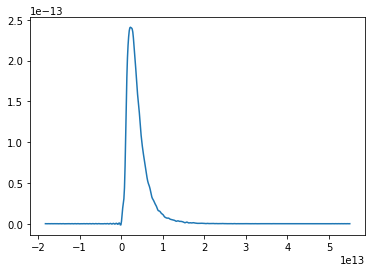

In [186]:
fig,ax=PP.subplots()

ax.plot(x,pdf)
# ax.set_xlim(0,0.5e7)


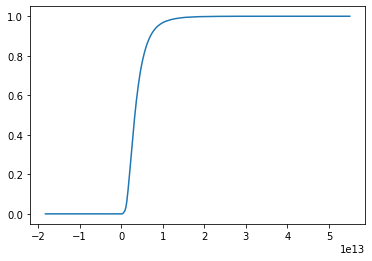

In [184]:
cdf=np.zeros_like(fkde.pdf)

for i in range(1,len(fkde.pdf)):
    cdf[i]=(fkde.deltaX*fkde.pdf)[:i].sum()
    
PP.plot(x,cdf)
# pSigma = x[np.where(cdf>=0.84)[0][0]]
# mSigma = x[np.where(cdf>=0.16)[0][0]]
# median = x[np.where(cdf>=0.50)[0][0]]

## Compare sizes between methods


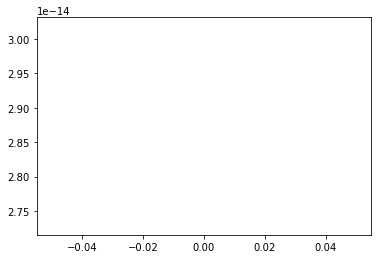

In [102]:
PP.plot(f.pdf_area_mean.values)


array([2.87339751e-14,            nan,            nan, ...,
                  nan,            nan,            nan])

In [ ]:
def median_sigmas(x,pdf):

    deltaX = np.mean(np.diff(x))
    cdf=np.zeros_like(pdf)
    for i in range(1,len(pdf)):
        cdf[i]=(deltaX*pdf)[:i].sum()
    pSigma = x[np.where(cdf>=0.84)[0][0]]
    mSigma = x[np.where(cdf>=0.16)[0][0]]
    median = x[np.where(cdf>=0.50)[0][0]]

    return median, mSigma, pSigma


In [44]:
with open("metadata_tier2.csv", "r") as fin:
    lines = fin.readlines()
    lines = lines[1:]


In [45]:
run = "cmip5_CSIRO-Mk3-6-0_historical" 

for line in lines:
    if run in line:
        rr,ntime,t0,units,calendar = line.split(",")
        ntime,t0,calendar = int(ntime),float(t0),calendar.split("\n")
        print(ntime,t0,units,calendar)
        

81759 36500.25 days since 1850-01-01 noleap



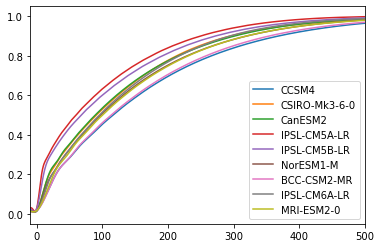

In [134]:
""" Plot background IVT CDFs """

fig,ax = PP.subplots()

for i,run in enumerate(runs[::2]):
    bk = xr.open_dataset("output/nc_cdf_pdf/ivt_bk_{}.nc".format(run))
    cdfbk = bk.mean_cdf_1.values
    ivtbk = bk.ivt
    
    ax.plot(ivtbk, cdfbk, label=labels1[i])
    
ax.set_xlim(-10,500)
ax.legend()


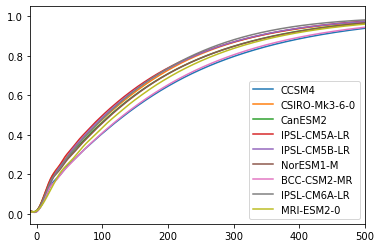

In [160]:
""" Plot background IVT CDFs """

fig,ax = PP.subplots()

for i,run in enumerate(runs[1::2]):
    bk = xr.open_dataset("output/nc_cdf_pdf/ivt_bk_{}.nc".format(run))
    cdfbk = bk.mean_cdf_1.values
    ivtbk = bk.ivt
    
    ax.plot(ivtbk, cdfbk, label=labels1[i])
    
ax.set_xlim(-10,500)
ax.legend()


In [21]:
f=xr.open_dataset("output/arciAreas/cmip5_CCSM4_historical.ARCI.areas.nc")
f


<xarray.Dataset>
Dimensions:  (time: 124, lat: 192, lon: 288, dim_areas: 128)
Coordinates:
  * time     (time) object 1963-12-01 00:00:00 ... 1963-12-31 18:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: dim_areas
Data variables:
    areas    (time, dim_areas) float64 ...
Attributes:
    TECA_version:   4.1.0
    TECA_app_name:  python3.8

In [4]:
# f.time


In [14]:
run = runs[0]
areas50,counts50,areas67,counts67,years = calculate_arci_areas(run)
create_arci_area_netcdf(run,areas50,counts50,areas67,counts67,years)


/global/homes/i/indah/RESEARCH/ARTMIP/tier2/CMIP56/Means//cmip5_CCSM4_historical/cmip5_CCSM4_historical.ar_confidence_index.1950.nc4


KeyboardInterrupt: 

In [13]:
try:
    f.close()
except:
    pass
f = xr.open_dataset("output/arciAreas/cmip5_CCSM4_historical.ARCI.areas.nc")
f


<xarray.Dataset>
Dimensions:  (time: 81759, lat: 192, lon: 288, dim_count: 1, dim_areas: 128)
Coordinates:
  * time     (time) object 1950-01-01 06:00:00 ... 2005-12-31 18:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: dim_count, dim_areas
Data variables:
    count    (time, dim_count) float64 ...
    areas    (time, dim_areas) float64 ...
Attributes:
    TECA_version:   4.1.0
    TECA_app_name:  python3.8

In [21]:
f.time


<xarray.DataArray 'time' (time: 81759)>
array([cftime.DatetimeNoLeap(1950, 1, 1, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 1, 1, 18, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2005, 12, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 12, 31, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 12, 31, 18, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1950-01-01 06:00:00 ... 2005-12-31 18:00:00
Attributes:
    axis:           T
    long_name:      time
    realtopology:   linear
    standard_name:  time

In [6]:
x5, pdf5, cdf5, mSigma5, pSigma5 =  calculate_ivt_pdfs(f.areas50.isel(areas=np.arange(f.count50)).values.ravel())
x6, pdf6, cdf6, mSigma6, pSigma6 =  calculate_ivt_pdfs(f.areas67.isel(areas=np.arange(f.count67)).values.ravel())


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()